In [2]:

from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd


def file_dict(file):
    data=pd.read_csv(file)
    text=''
    for row in data.index:
        text=text+data.loc[row,'내용']

    okt=Okt() # Open Korean Text 객체 생성


    sentences_tag=okt.pos(text)

    noun_list=[]
    # tag가 명사인 단어들만 noun_list에 넣어준다.
    for word,tag in sentences_tag:
        if tag =='Noun':
            noun_list.append(word)

    # 가장 많이 나온 단어부터 80개를 저장한다.
    counts=Counter(noun_list)
    tags=counts.most_common(80)
    #print(tags)



    dict_tags=dict(tags)


    # 제외단어
    word_pop=['면접','후기','것','수','및','글','이','데이터','댓글','머신','딥','러닝',
            '개발자','데이타','나','더','내','글뷰','검색','카카오','블로그','준비','인공','지능','때','그','대해','제',
            '등','대한','때문']

    for word in word_pop:
        if word in dict_tags:
            dict_tags.pop(word)
    
    return dict_tags

developer='developer.csv'
datasci='datascientist.csv'
dataeng='dataengineer.csv'
machineng='machineengineer.csv'
deppeng='deepengineer.csv'
ai='ai.csv'

# 워드 클라우드 플롯
# dict_tags=file_dict(developer)    
# wordcld(dict_tags)



In [3]:
# 개발자, 데이터 엔지니어, 머신러닝 추출
devel_df=pd.DataFrame(pd.Series(file_dict(developer)),columns=['개발자'])
dataeng_df=pd.DataFrame(pd.Series(file_dict(dataeng)),columns=['데이터엔지니어'])
machineng_df=pd.DataFrame(pd.Series(file_dict(machineng)),columns=['머신러닝엔지니어'])

In [23]:
# 전체 비율 구하는 함수
def ratio(df):
    df_ratio = round(df/df.sum()*100,2)
    return df_ratio


In [24]:
dataDF=ratio(devel_df).join(ratio(dataeng_df),how='inner').join(ratio(machineng_df),how='inner')
dataDF

,개발자,데이터엔지니어,머신러닝엔지니어
질문,5.13,3.81,1.39
생각,3.72,3.69,1.92
개발,3.07,1.55,2.25
지원,2.95,2.50,2.02
기술,2.58,2.12,2.19
문제,2.57,3.57,2.38
관련,2.38,2.10,2.33
보기,2.32,1.34,1.40
공부,1.86,2.61,1.51
다른,1.66,1.95,1.54


In [25]:
bar=pd.concat([dataDF.loc['질문'],dataDF.loc['생각'],dataDF.loc['개발'],dataDF.loc['공부'],dataDF.loc['사용'],dataDF.loc['알고리즘']],axis=1)
bar

,질문,생각,개발,공부,사용,알고리즘
개발자,5.13,3.72,3.07,1.86,1.48,1.22
데이터엔지니어,3.81,3.69,1.55,2.61,1.93,1.28
머신러닝엔지니어,1.39,1.92,2.25,1.51,3.62,2.10


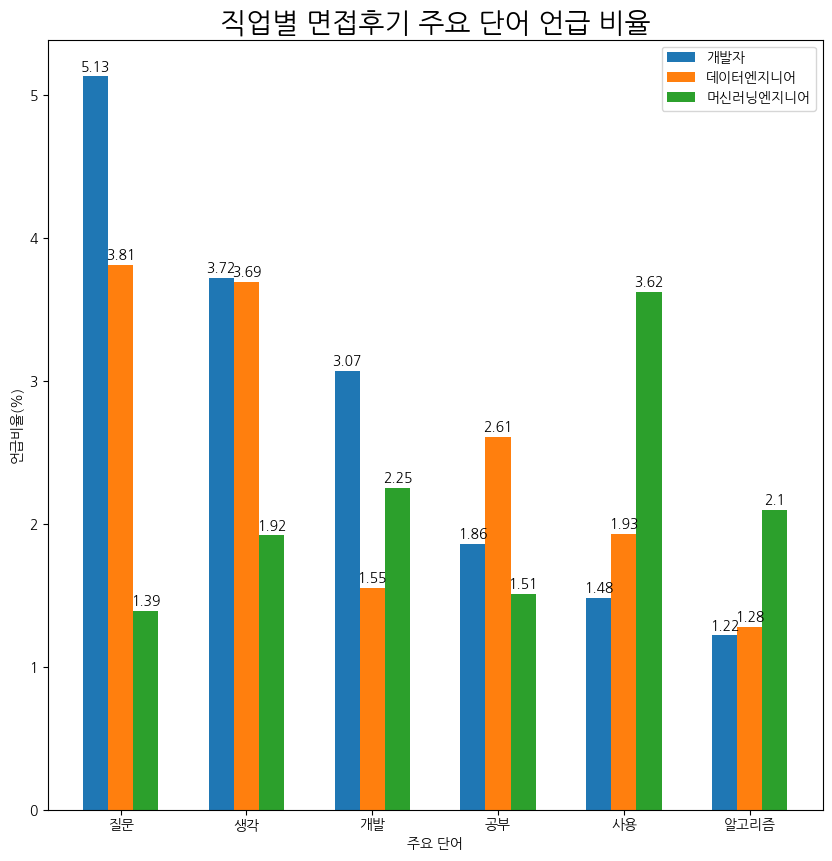

In [28]:
import koreanize_matplotlib
x=pd.Series(range(6))
plt.figure(figsize=(10,10))
a=plt.bar(x-0.2,bar.loc['개발자'],width=0.2,label='개발자')
b=plt.bar(x,bar.loc['데이터엔지니어'],width=0.2,label='데이터엔지니어')
c=plt.bar(x+0.2,bar.loc['머신러닝엔지니어'],width=0.2,label='머신러닝엔지니어')
plt.xticks(x,['질문','생각','개발','공부','사용','알고리즘'])
plt.title('직업별 면접후기 주요 단어 언급 비율',fontsize=20)
plt.xlabel('주요 단어')
plt.ylabel('언급비율(%)')
plt.bar_label(a,padding=2)
plt.bar_label(b,padding=2)
plt.bar_label(c,padding=2)
plt.legend()
plt.show()